# Predicting House Price: Linear Regression (with Scikit-Learn) Pipeline

## Purpose:

The purpose of this project is to create a linear regression model to predict housing prices (in the Seattle area) using housing attributes as features. This module takes a step-by-step approach from start to finish.

In [148]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import mglearn
%matplotlib inline

## The Data

The data set is given as a csv file. Let us take a look at the data set to see what we have and what we can work with.

In [2]:
#Load the data set to a data frame called df
df=pd.read_csv("home_data.csv")

In [3]:
#Use the .head() method to get an overview of our data set
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#Number of rows (data points):
len(df)

21613

### Columns (feature candidates)

Let's see what our feature candidates are by looking at the columns

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Info

The info method is useful to get a summary of the data and data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


We see that we have 21613 data points (confirmed by the len method). We also notice that each column has 21613 non-null values. Thus, we don't need to clean up null values.

Also of interest, we see that all of our potential features (except date, which we wouldn't want to use as a feature) are integer or floats. But does this mean that all values are quantitative? Let us, investigate this question. Ideally, we would already have this information, as well as descriptions of the values of each column, but let us assume we are missing this information, and must make our own assumptions of the data.

First note that although id has integer values, it is not quantitative. Each data point will be given a unique value. These values are not ordered, not comparable, and do not have a meaningful zero value. We must not treat the id as a feature...quantitative or categorical.

Next, we notice that waterfront contains boolean values, which are categorical, not quantitative. However, when we are given categorical data, the standard practice is to convert them to zeros and ones and treat them as if they were quantitative. If, for example, we had a feature such as "location" that contained several categorical values, such as "waterfront", "mountain side", etc., we would use a process called one-hot-encoding to convert the categorical data into numerical values. To do this, we create new features...each new feature is the name of the category, and the values can be a one or a zero...a one if the data point has that feature, and a zero if the data point does not have that feature. In our case, there is only one "location" category..."waterfront".

What about condition? Let us look at some values to see if we can make sense of it. We can use the set function to view unique values in the column...

In [7]:
set(df.condition)

{1, 2, 3, 4, 5}

Let us view the condition feature as having quantitative values. We may assume the values are ordered, comparable, and have a meaningful zero value.

Let us make the same assumption about the grade...

In [8]:
set(df.grade)

{1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

Finally, let's note that although zip code contains integer values, it is NOT quantitative data, it is categorical. 

# Data Analysis
We begin with some data analysis to get an overview of the statistics. An easy first step might be to use the describe method, which gives us a few statistics about the data in each column.

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Most expensive zip code

We can see from above that the most expensive house is more than 100 times more expensive than the least expensive house! From experience, we know that expensive houses usually don't mingle with inexpensive houses. There tends to be expensive neighborhoods and inexpensive neighborhoods. Let's find out what the most expensive zipcode is.

In [10]:
#Group by zip code. Create the groupby object
zip_grouped=df.groupby("zipcode")

In [11]:
#Number of different zip codes
len(zip_grouped)

70

In [12]:
most_expensive_zip=0
for tup in zip_grouped:
    avg_price=tup[1].price.mean()
    if avg_price>most_expensive_zip:
        most_expensive_zip=avg_price
        zipcode=tup[0]

In [13]:
print((zipcode,most_expensive_zip))

(98039, 2160606.6)


Create a data frame containing data points only from the most expensive zip code. Then let's look at the statistics

In [14]:
exp_df=zip_grouped.get_group(zipcode)

In [15]:
exp_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,5.000000e+01,5.000000e+01,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.00000,50.000000,50.0,50.00000,50.000000,50.000000,50.000000
mean,3.755708e+09,2.160607e+06,4.060000,3.200000,3800.9000,17403.560000,1.560000,0.020000,0.440000,3.480000,9.560000,3290.900000,510.00000,1972.52000,398.600000,98039.0,47.62584,-122.233540,3132.200000,17291.100000
std,1.658802e+09,1.166477e+06,0.890081,1.366509,1764.5025,6655.224175,0.501427,0.141421,0.993037,0.579937,1.655664,1595.431517,714.84264,25.55765,805.319863,0.0,0.00886,0.004858,701.535604,5957.568571
min,2.210500e+09,7.875000e+05,2.000000,1.000000,1220.0000,6572.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1080.000000,0.00000,1902.00000,0.000000,98039.0,47.61020,-122.241000,1590.000000,8119.000000
25%,2.525049e+09,1.401000e+06,4.000000,2.250000,2680.0000,13797.500000,1.000000,0.000000,0.000000,3.000000,8.000000,2070.000000,0.00000,1954.00000,0.000000,98039.0,47.61875,-122.237000,2810.000000,14312.750000
50%,3.262301e+09,1.892500e+06,4.000000,3.000000,3560.0000,17188.500000,2.000000,0.000000,0.000000,3.000000,9.000000,3110.000000,0.00000,1966.00000,0.000000,98039.0,47.62390,-122.235500,3105.000000,16582.500000
75%,3.811127e+09,2.556250e+06,4.750000,3.687500,4452.5000,20052.250000,2.000000,0.000000,0.000000,4.000000,11.000000,4277.500000,1027.50000,1995.00000,0.000000,98039.0,47.63325,-122.229250,3567.500000,19855.000000
max,9.208900e+09,6.885000e+06,7.000000,7.750000,9890.0000,35069.000000,2.000000,1.000000,4.000000,5.000000,13.000000,8860.000000,3000.00000,2014.00000,2007.000000,98039.0,47.64130,-122.223000,4660.000000,42730.000000


It looks like we were right about our hunch that expensive homes cluster together. We see that the minimum house price in this zip code is 787,500!

### Histograms

We may use matplotlib's hist method on the pandas data frame to get a quick view of the histograms for each feature.

In [16]:
columns=list(df.columns)

In [17]:
remove_list=["id","date","zipcode","lat","long"]
for item in remove_list:
    columns.remove(item)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021168587B00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000211693396D8>]], dtype=object)

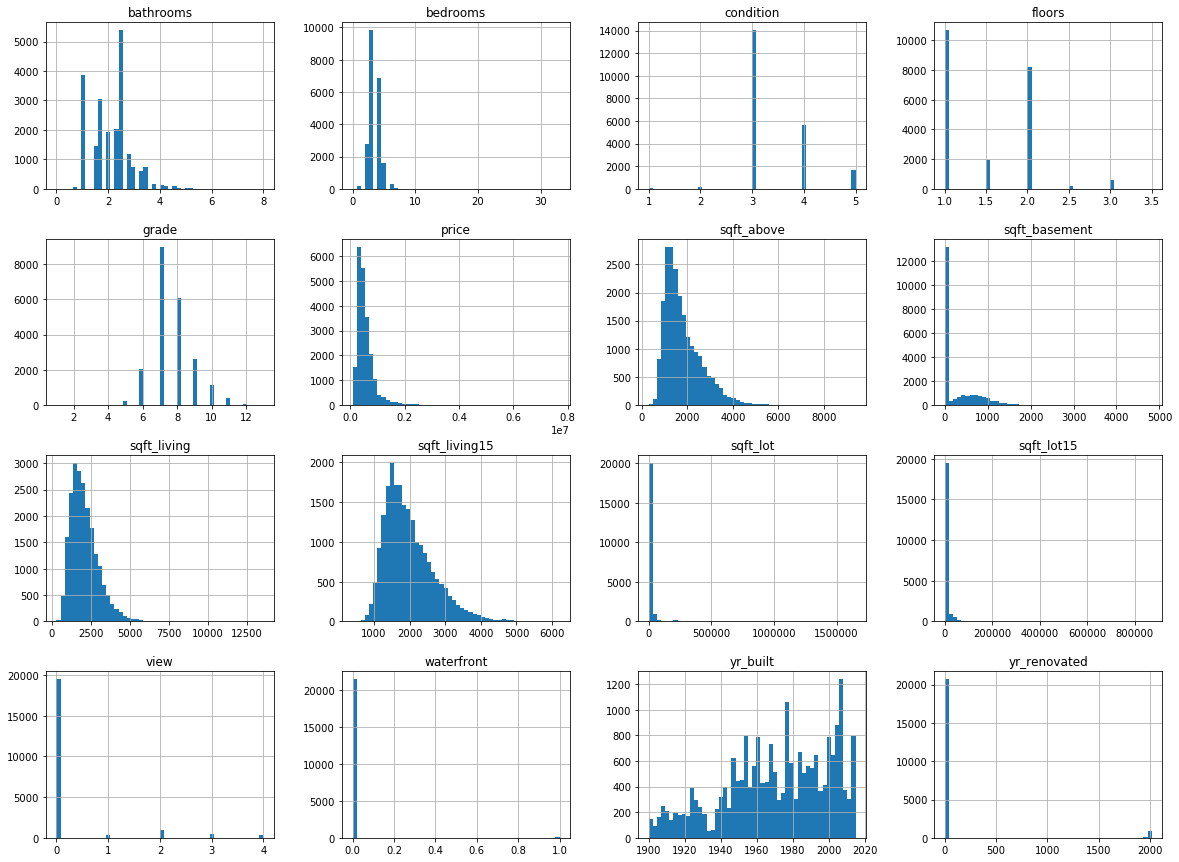

In [18]:
df[columns].hist(bins=50,figsize=(20,15))

We notice that several of our histograms tend to be tail heavy, i.e. not normal distributions. Detecting patterns may become more difficult for some algorithms in this case. We will revisit this issue later.

## Correlation between square feet and price
Investigate the relationship between square feet (an obvious candidate as a predictor of price) and the sale price

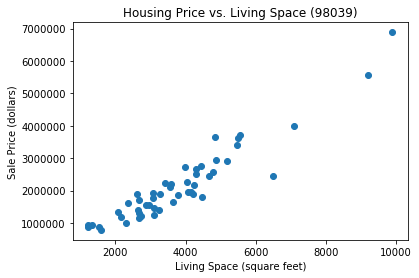

In [21]:
plt.figure()
plt.title("Housing Price vs. Living Space (98039)")
plt.xlabel("Living Space (square feet)")
plt.ylabel("Sale Price (dollars)")
plt.scatter(exp_df.sqft_living,exp_df.price)

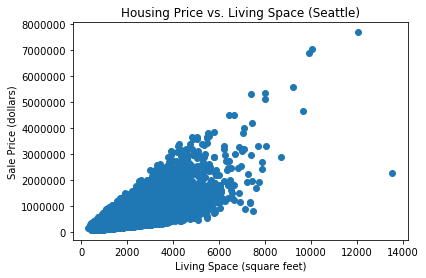

In [22]:
#We see a fairly strong linear correlation. Let us compare this to the entire data set
plt.figure()
plt.title("Housing Price vs. Living Space (Seattle)")
plt.xlabel("Living Space (square feet)")
plt.ylabel("Sale Price (dollars)")
plt.scatter(df.sqft_living,df.price)

We see that we get a much stronger linear relationship when we group by zip code

Let's use the corr method to investigate other possible correlations between features and price

In [33]:
corr_matrix=df[columns].corr()

In [34]:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
Name: price, dtype: float64

We see that sqft_living has the highest correlation coefficient, as expected. We also note that grade has the next highest correlation coefficient. Another interesting observation is that we have all positive correlations. Does this mean that the coefficients of the linear model will all be positive? Perhaps not, since there are strong correlations between the features themselves. For example, an increase in bedrooms corresponds to a higher price, but an increase in bedrooms is also correlated with larger houses (our best indicator feature). For the bedrooms coefficient to be positive, that would indicate price would increase as bedrooms increase, while living space is held constant. Do we really believe that houses of equal size but more bedrooms command a higher price? Perhaps not.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002110B11B1D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002110C62AF28>]], dtype=object)

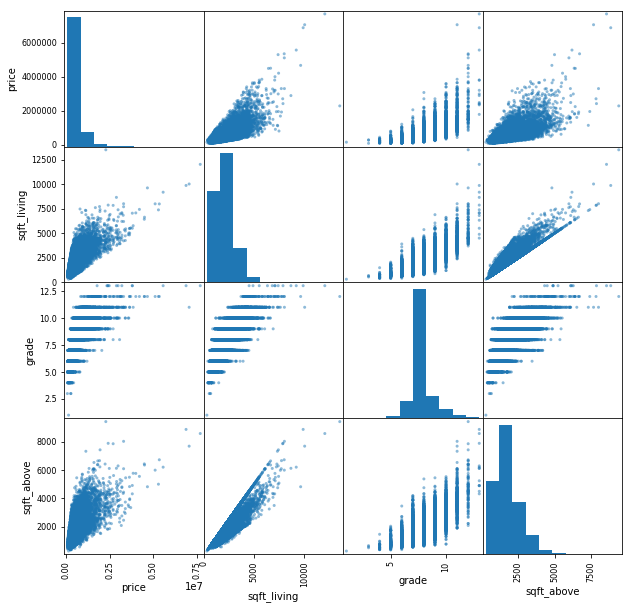

In [37]:
pd.plotting.scatter_matrix(df[["price","sqft_living","grade","sqft_above"]],figsize=(10,10))

### More Features

Let's create a few more features from our original features. Let's also create a column for log (base 10) of the price. Later, we may try correlating our features with the log of the price, instead of the price.

In [66]:
#For each data point in the data frame, we look at the zipcode and then append to a new list the average sqft_living for
#that particular zip code. Subsequently, we will create a new feature which is the ratio of sqft_living to average sqft_living
averages={}
for zipcode in set(df.zipcode):
    averages[zipcode]=zip_grouped.get_group(zipcode)["sqft_living"].mean()
mean_sqft_per_zipcode=[averages[zipcode] for zipcode in df.zipcode]

In [67]:
#log base 10 of price
df["log_price"]=df["price"].apply(np.log10)
#sqft_living squared
df["sqft_squared"]=df["sqft_living"]**2
#ratio of sqft_living to grade
df["sqft/grade"]=df["sqft_living"]/df["grade"]
#create a column that contains the average sqft_living for the respective zip code. Then create a feature that is the
#ratio of the sqft_living to the average sqft_living
df["mean_sqft_per_zipcode"]=mean_sqft_per_zipcode
df["sqft_living/mean"]=df["sqft_living"]/df["mean_sqft_per_zipcode"]

In [117]:
#Define a list of these derived features
derived_features=["sqft_squared","sqft/grade","sqft_living/mean"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021118DBB080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002111A8221D0>]], dtype=object)

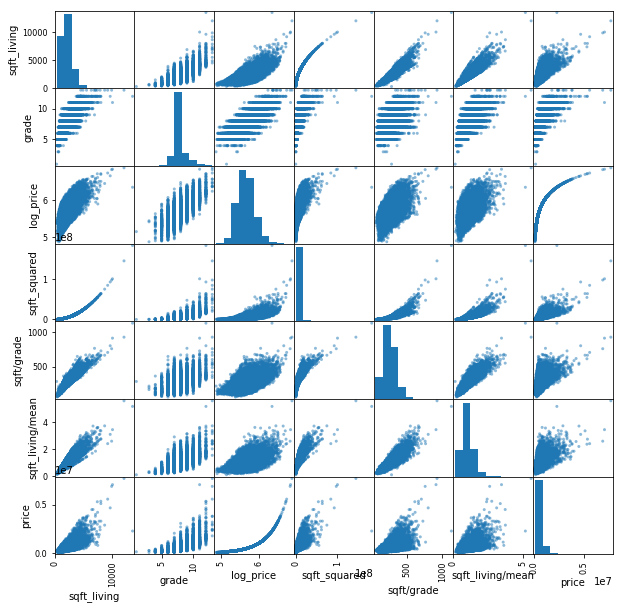

In [68]:
pd.plotting.scatter_matrix(df[["sqft_living","grade","log_price","sqft_squared",
                               "sqft/grade","sqft_living/mean","price"]],figsize=(10,10))

### Linear Regression in One Dimension
Let us examine how well we can predict sale price in the most expensive zip code based on living space alone. We begin by separating our data into train and test sets using sklearn's train_test_split method.

Note: it probably would have been more proper of us if we had separated our data into train and test sets BEFORE we did our data analysis. We want to set aside a test set and completely ignore it so that we don't get any information out of it. In other words, we want to base our model intirely on a train set, and be able to convince ourselves that our performance on the test set would be representative of our model's performance on any unseen data.

In [69]:
#Split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(exp_df.sqft_living.values.reshape(-1,1),exp_df.price.values.reshape(-1,1),
                                               random_state=42)

In [70]:
#Instantiate and fit the regression model 
lrone=LinearRegression().fit(X_train,y_train)

In [71]:
#Display the slope and intercept
print("w0 (intercept): {}".format(lrone.intercept_[0]))
print("w1 (slope): {}".format(lrone.coef_[0][0]))

w0 (intercept): -131088.74798885942
w1 (slope): 600.9359768008015


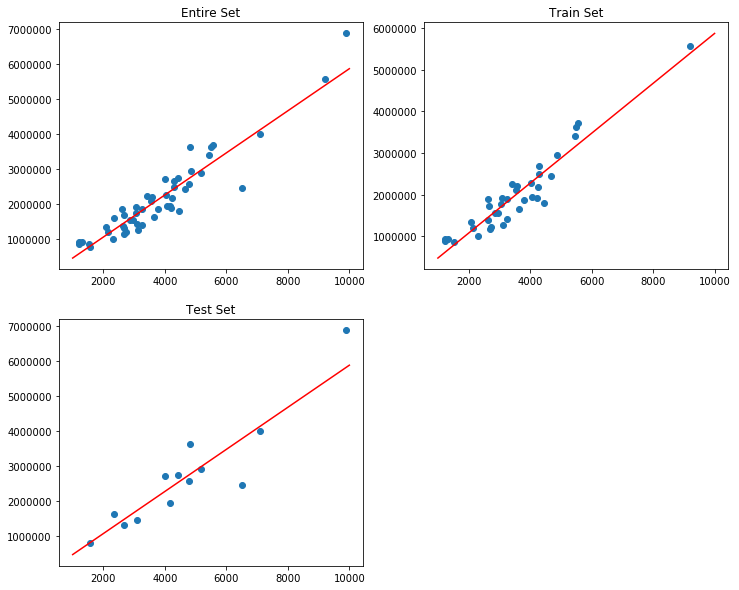

In [73]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title("Entire Set")
plt.scatter(exp_df.sqft_living,exp_df.price)
plt.plot([1000,10000],[lrone.predict(1000)[0][0],lrone.predict(10000)[0][0]],color="red",linestyle="-")
plt.subplot(2,2,2)
plt.title("Train Set")
plt.scatter(X_train,y_train)
plt.plot([1000,10000],[lrone.predict(1000)[0][0],lrone.predict(10000)[0][0]],color="red",linestyle="-")
plt.subplot(2,2,3)
plt.title("Test Set")
plt.scatter(X_test,y_test)
plt.plot([1000,10000],[lrone.predict(1000)[0][0],lrone.predict(10000)[0][0]],color="red",linestyle="-")

In [74]:
#Coeficient of determination (r squared)
print("Train Score: {}".format(lrone.score(X_train,y_train)))
print("Test Score: {}".format(lrone.score(X_test,y_test)))

Train Score: 0.8959969339526196
Test Score: 0.8508868304527851


In [75]:
#Mean squared error
def rmse(predictions,targets):
    return np.sqrt(((predictions-targets)**2).mean())

In [76]:
print("Train RMSE: {}".format(rmse(lrone.predict(X_train),y_train)))
print("Test RMSE: {}".format(rmse(lrone.predict(X_test),y_test)))

Train RMSE: 302550.62951055064
Test RMSE: 577342.4730637561


## Multi Feature Model

In [101]:
#We will consider two sets of features, one that has six features and one that has 18 features
basic_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [102]:
#data sets
y=df.price
Xb=df[basic_features]
Xa=df[advanced_features]

In [103]:
#Separate into training and test sets. We will set the random state to zero for each split so that the train and test sets
#are the same for each feature set
Xb_train,Xb_test,y_train,y_test=train_test_split(Xb,y,random_state=0)
Xa_train,Xa_test,ya_train,ya_test=train_test_split(Xa,y,random_state=0)

In [104]:
#Train our models
lrb=LinearRegression().fit(Xb_train,y_train)
lra=LinearRegression().fit(Xa_train,y_train)

In [159]:
#Coeficient of determination (r squared)
print("Basic Train Score: {}".format(lrb.score(Xb_train,y_train)))
print("Basic Cross Validation Score: {}".format(cross_val_score(LinearRegression(),Xb_train,y_train,cv=20).mean()))
print("\nAdvanced Train Score: {}".format(lra.score(Xa_train,y_train)))
print("Advanced Cross Validation Score: {}".format(cross_val_score(LinearRegression(),Xa_train,y_train,cv=20).mean()))


Basic Train Score: 0.517913964489519
Basic Cross Validation Score: 0.506119764337682

Advanced Train Score: 0.6987589078879363
Advanced Cross Validation Score: 0.6927208914342498


Our advanced cross validated score was 0.69. This is significantly lower than the test score of 0.85 for the one-diensional, single zipcode model. Thus, for higher accuracy, we could consider training models for each of the zipcodes. However, that is not the point of this module.

Let us see if using one-hot-encoding for the zipcodes can improve our accuracy.

### Adding Zip Codes as Features:

In [108]:
df["zipcode"]=df["zipcode"].apply(str)

In [109]:
df2=df[advanced_features+["zipcode",]]

In [111]:
df3=pd.get_dummies(df2)

In [112]:
df3.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,waterfront,view,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1180,5650,1.0,3,7,0,0,1180,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,3,7,0,0,2170,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,3,6,0,0,770,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,5,7,0,0,1050,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,3,8,0,0,1680,...,0,0,0,0,0,0,0,0,0,0


In [114]:
X3_train,X3_test,y_train,y_test=train_test_split(df3,y,random_state=0)

In [115]:
lr3=LinearRegression().fit(X3_train,y_train)

In [158]:
#Coeficient of determination (r squared)
print("Train Score: {}".format(lr3.score(X3_train,y_train)))
print("Test Score: {}".format(cross_val_score(LinearRegression(),X3_train,y_train,cv=10).mean()))

Train Score: 0.8067741447991603
Test Score: 0.8037313543473228


As suspected, including the zipcode features dramatically increased our accuracy. Finally, let's include our derived features.

### Derived Features:

In [249]:
df4=df[advanced_features+["zipcode",]+derived_features]

In [250]:
df5=pd.get_dummies(df4)

In [251]:
X5_train,X5_test,y_train,y_test=train_test_split(df5,y,random_state=0)

In [252]:
lr5=LinearRegression().fit(X5_train,y_train)

In [253]:
#Coeficient of determination (r squared)
print("Train Score: {}".format(lr5.score(X5_train,y_train)))
print("Cross Validation Score: {}".format(cross_val_score(LinearRegression(),X5_train,y_train,cv=10).mean()))

Train Score: 0.8339888397240761
Cross Validation Score: 0.8253376138736501


Indeed, we did get a significant improvement in score with these additional features. In fact, our scores are approaching the scores of the one-dimensional, zip code specific model.

Finally, let's train a model with the above features, but with log(price) as the target.

### Predicting log(price)

In [133]:
#Define the new target set
y2=df.log_price

In [134]:
#Create a train-test-split using the previous features but with the new target set
X6_train,X6_test,y6_train,y6_test=train_test_split(df5,y2,random_state=0)

In [135]:
#Instantiate and fit a linear regression model
lr_logprice=LinearRegression().fit(X6_train,y6_train)

In [257]:
#Use the predict method of the linear regression model to predict train and test values. Then map the values back to price
#by raising 10 to the power of the predicted value. Create series for the predicted train price
train_price_predict=pd.Series(lr_logprice.predict(X6_train)).apply(lambda x: 10**x)

In [258]:
#We can use the sklearn.metrics.r2_score method to compute the r squared value for the train set and test set
print("Train Score: {}".format(sklearn.metrics.r2_score(y6_train.apply(lambda x: 10**x),train_price_predict)))

Train Score: 0.8762634360707866


Due to the fact that we have to convert our predicted values into price values via exponentiation, the cross validation is slightly more involved than calling the scikit-learn's cross validation method. 

In [243]:
#Create validation indexes for 10 folds (k=10) 
k=10
step=len(X6_train)//k
start_stop_tups=[]
for i in range(k-1):
    start_stop_tups.append((i*step,(i+1)*step))
start_stop_tups.append(((k-1)*step,len(X6_train)))

#Create the train and validation sets
kfold_train_valid_sets=[]
for tup in start_stop_tups:
    X_valid=X6_train.iloc[tup[0]:tup[1]]
    X_train=pd.concat([X6_train.iloc[:tup[0]],X6_train.iloc[tup[1]:]])
    y_valid=y6_train[tup[0]:tup[1]]
    y_train=pd.concat([y6_train[:tup[0]],y6_train[tup[1]:]])
    kfold_train_valid_sets.append((X_train,X_valid,y_train,y_valid))
    
#Create a list of models trained on each fold
cross_validated_models=[LinearRegression().fit(fold[0],fold[2]) for fold in kfold_train_valid_sets]
#Create a list of pd.Series containing the predicted prices
valid_price_predict=[pd.Series(cross_validated_models[i].predict(kfold_train_valid_sets[i][1])).apply(lambda x: 10**x)
                    for i in range(len(kfold_train_valid_sets))]

#Calculate the scores and append to a list
cross_validated_scores=[]
for i in range(len(valid_price_predict)):
    score=sklearn.metrics.r2_score(kfold_train_valid_sets[i][3].apply(lambda x: 10**x),valid_price_predict[i])
    cross_validated_scores.append(score)
    
#average the values in the cross validation score list
avg_cross_val_score=sum(cross_validated_scores)/len(cross_validated_scores)

In [245]:
#Let's view the train and validation scores
print("Train Score: {}".format(sklearn.metrics.r2_score(y6_train.apply(lambda x: 10**x),train_price_predict)))
print("Validation Score: {}".format(avg_cross_val_score))

Train Score: 0.8762634360707866
Validation Score: 0.8724806801797161


This is our best model yet! Let us choose this as our preferred model. Now we may test this model on our test set.

In [259]:
test_price_predict=pd.Series(lr_logprice.predict(X6_test)).apply(lambda x: 10**x)
print("Test Score: {}".format(sklearn.metrics.r2_score(y6_test.apply(lambda x: 10**x),test_price_predict)))

Test Score: 0.8683042415035115


# Conclusion

We considered four main approaches to train our model. The first approach considered all the quantitative data in our data set as features. The second approach utilized the all the afformentioned features but also included one-hot-encoded zip code features. This was inspired by the observed high correlation between price and sqft_living. The next approach used all the previous features but included a few more features that were derived from other features. Finally, our initial data analysis showed a slightly more linear relationship between the log of the price and the sqft_living feature (our main predictive feature), as well as the other derived features. Thus, our fourth approach was to train a linear regression model with the previous features and the log of the price as the target set.

The r2 scores of each approach, improved over the previous. The first approach yielded r2 scores of 0.70 and 0.68 for the train and test sets respectively, while the last approach yielded r2 scores of 0.88 and 0.87 for the train and test sets respectively.

These approaches were not exhaustive, and further analysis could possibly result in a more accurate model.